In [21]:
import networkx as nx
import matplotlib.pyplot as plt
import pprint
import collections

# Graf i tworzenie grafu

Graf = zbiór wierzchołków i krawędzi (aka linków) pomiędzy parami wierzchołków.

W NetworkX wierzchołkiem może być dowolny hashable obiekt, np. tekst, obrazek, obiekt XML, inny graf i wiele innych.

In [20]:
G = nx.Graph() # domyślnie tworzymy graf nieskierowany
G.add_node(1)
G.add_nodes_from([2, 3])
G.add_edge(1, 2)
G.add_edge(3,5)
G.add_edge(6,0)
G.add_edge(1,5)
G.add_edge(1,0)
G.add_edge(2,5)
G.add_edge(6,5)
G.add_edges_from([(1, 2), (1, 3)])
print('Lista wierzchołków: ',list(G.nodes))
print('Lista krawędzi: ',list(G.edges))
print('Sąsiedzi wierzchołka 1: ',list(G.adj[1]))
print('Liczba wierzchołków o stopniu 1: ',G.degree[1])

Lista wierzchołków:  [1, 2, 3, 5, 6, 0]
Lista krawędzi:  [(1, 2), (1, 5), (1, 0), (1, 3), (2, 5), (3, 5), (5, 6), (6, 0)]
Sąsiedzi wierzchołka 1:  [2, 5, 0, 3]
Liczba wierzchołków o stopniu 1:  4


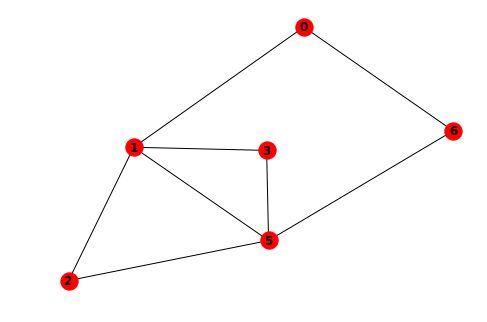

In [10]:
# Rysowanie grafu
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

# Layouts i opcje rysowania

Layout w NetwokrkX oznacza sposób rozplanowania węzłów w wizualizacji grafu.
Lista dostępnych layoutów: 
   https://networkx.github.io/documentation/stable/reference/drawing.html#module-networkx.drawing.layout

### Przykłady:

#### shell_layout 
Position nodes in concentric circles.
Currently only works in two dimensions and does not try to minimize edge crossings.

#### spring_layout 
Position nodes using Fruchterman-Reingold force-directed algorithm.
Its purpose is to position the nodes of a graph in two-dimensional or three-dimensional space 
so that all the edges are of more or less equal length and there are as few crossing edges 
as possible, by assigning forces among the set of edges and the set of nodes, 
based on their relative positions, and then using these forces either to simulate the motion 
of the edges and nodes or to minimize their energy.

#### kamada_kawai_layout 
Position nodes using Kamada-Kawai path-length cost-function.
Imagine that the n vertices in an on-screen graph are
connected by springs. The graph becomes a dynamical
system that tries to reach a minimum-energy state, where
springs are, as much as possible, not stretched or
compressed overmuch from their “relaxed-state length”.

shell_layout


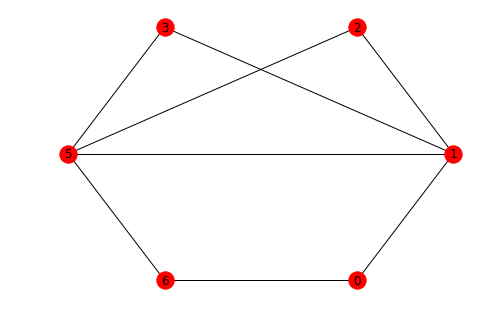

spring_layout


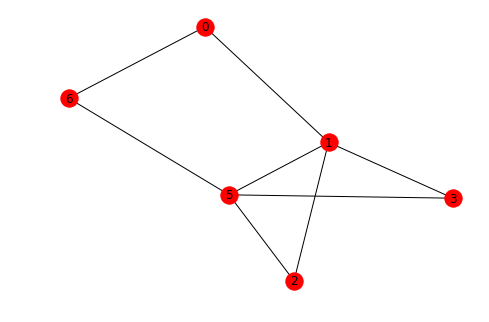

kamada_kawai_layout


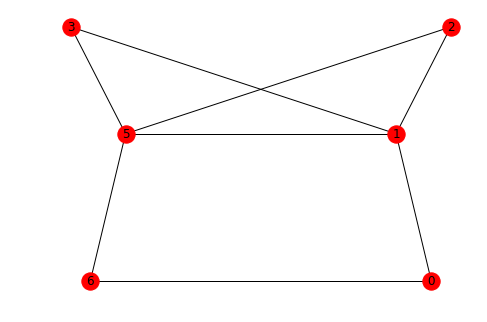

circular_layout


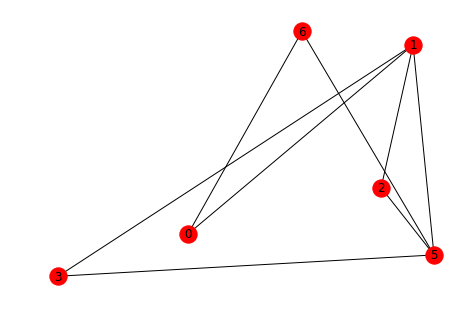

In [17]:
# TODO: Narysuj graf G przy użyciu: 
# shell_layout, spring_layout, kamada_kawai_layout, random_layout
# oraz dowolnego innego layoutu. Zaobserwuj różnice.
# Jak można zmodyfikować strukturę grafu, żeby wyniki były ciekawsze?

print("shell_layout")
pos = nx.shell_layout(G)
nx.draw(G, pos=pos, with_labels=True)
plt.show()

print("spring_layout")
pos = nx.spring_layout(G)
nx.draw(G, pos=pos, with_labels=True)
plt.show()

print("kamada_kawai_layout")
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos=pos, with_labels=True)
plt.show()

print("random_layout")
pos = nx.random_layout(G)
nx.draw(G, pos=pos, with_labels=True)
plt.show()

In [ ]:
def get_histogram(G):
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())

    fig, ax = plt.subplots()
    plt.bar(deg, cnt, width=0.80, color='b')

    plt.title("Degree Histogram")
    plt.ylabel("Count")
    plt.xlabel("Degree")
    ax.set_xticks([d + 0.4 for d in deg])
    ax.set_xticklabels(deg)

    plt.show()

# Generatory grafow
Funkcje generujące grafy o określonej strukturze.

https://networkx.github.io/documentation/latest/reference/generators.html

### Przykłady:

#### wheel_graph(n) 
Return the wheel graph which consists of a hub node connected to a cycle of (n-1) nodes.

#### star_graph(n)
Return the Star graph with n+1 nodes: one center node, connected to n outer nodes.

#### binomial_graph(n,p) 
Returns a G(n,p) random graph, also known as an Erdős-Rényi graph or a binomial graph.
The binomial distribution with parameters n and p is the discrete probability distribution of                         the number of successes in a sequence of n independent experiments, each asking a yes–no                               question, and each with its own boolean-valued outcome:
The G(n,p) model chooses each of the possible edges with probability p.
                      
##### Przykład użycia:

G_star = nx.networkx.generators.star_graph(10)

Wheel graph


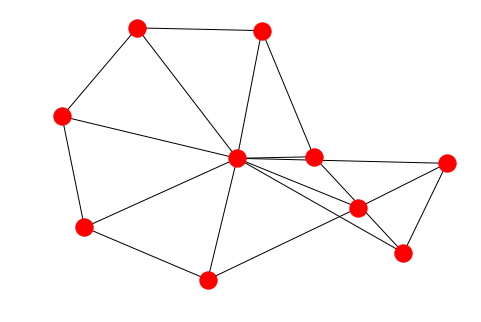

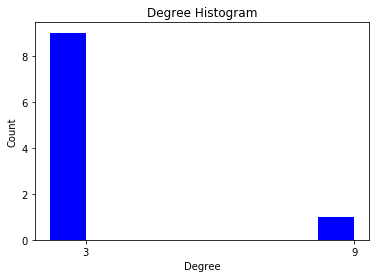

Average node connectivity:  3.0


In [54]:
# TODO: Stwórz wheel graph i narysuj go. Wyświetl jego histogram, oblicz 'average node connectivity'
#       (patrz funkcja: average_node_connectivity)

print('Wheel graph')
G_wheel = nx.networkx.generators.wheel_graph(10)
nx.draw(G_wheel)
plt.show()

get_histogram(G_wheel)

avg_node_connectivity = nx.networkx.average_node_connectivity(G_wheel)
print('Average node connectivity: ', avg_node_connectivity)

Star graph


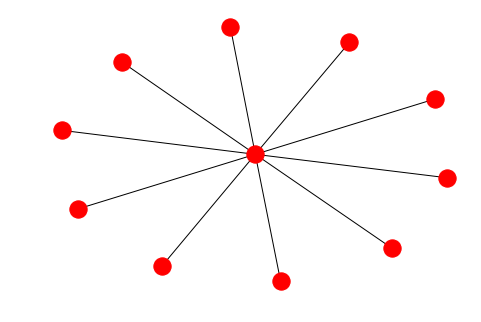

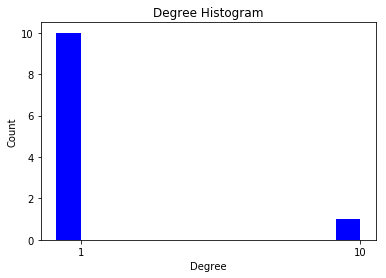

Average node connectivity:  1.0


In [55]:
# TODO: Stwórz star graph i narysuj go. Wyświetl jego histogram, oblicz 'average node connectivity'.

print('Star graph')
G_star = nx.networkx.generators.star_graph(10)
nx.draw(G_star)
plt.show()

get_histogram(G_star)

avg_node_connectivity = nx.networkx.average_node_connectivity(G_star)
print('Average node connectivity: ', avg_node_connectivity)

Binominal graph


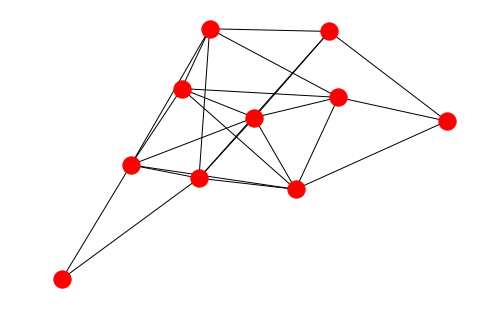

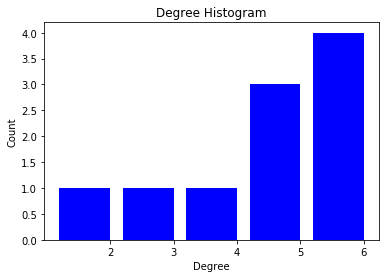

Average node connectivity:  3.933333333333333


In [56]:
# TODO: Stwórz binominal graph, w którym każda krawędź ma 50% szans wystąpienia.
#       Narysuj go. Wyświetl jego histogram, oblicz 'average node connectivity'.
#       Wygeneruj graf kilkukrotnie i zaobserwuj różnice.

print('Binominal graph')
G_binominal = nx.networkx.generators.binomial_graph(10, 0.5)
nx.draw(G_binominal)
plt.show()

get_histogram(G_binominal)

avg_node_connectivity = nx.networkx.average_node_connectivity(G_binominal)
print('Average node connectivity: ', avg_node_connectivity)

In [57]:
# TODO:
# Stwórz pełny graf o 10 wierzchołkach na dwa różne sposoby i wyświetl otrzymane grafy obok siebie, korzystając
# z różnych circular layouts i random layouts.
# 
# Pomocne linki:
# https://networkx.github.io/documentation/latest/reference/generators.html
# https://networkx.github.io/documentation/stable/reference/drawing.html#module-networkx.drawing.layout

# full_graph = ...
# full_graph_2 = ...

class Exercise1():
    
    def __init__(self):
        self.full_graph_1 = None
        self.full_graph_2 = None
        self.create_full_graph_one_way()
        self.create_full_graph_another_way()
    
    def create_full_graph_one_way(self):
        # self.full_graph_1 = ... implement here!
        raise Exception("Not implemented")
        
    def create_full_graph_another_way(self):
        # self.full_graph_2 = ... implement here!
        raise Exception("Not implemented")
        
    def plot_both_graphs(self):
        nx.draw(self.full_graph_1, pos=nx.circular_layout(self.full_graph_1))
        plt.show()
        nx.draw(self.full_graph_2, pos=nx.random_layout(self.full_graph_2))
        plt.show()
        
    def validate(self):
        result = nx.is_isomorphic(self.full_graph_1, self.full_graph_2)
        if not result:
            raise Exception("Graphs are not equal")

exercise1 = Exercise1()
exercise1.plot_both_graphs()
exercise1.validate()

Exception: Not implemented

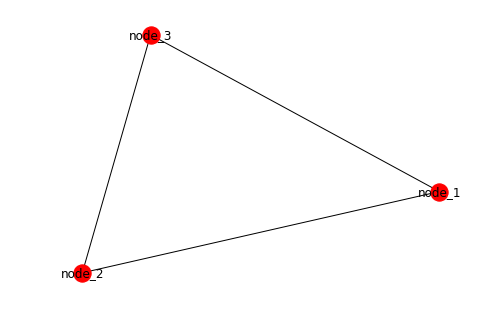

In [136]:
# Wczytywanie grafu z pliku

graph_from_file = nx.Graph()
edges = nx.read_edgelist('edges.txt')
nodes = nx.read_adjlist("nodes.txt")
graph_from_file.add_edges_from(edges.edges())
graph_from_file.add_nodes_from(nodes)
nx.draw(graph_from_file, with_labels=True)

# Community w grafie 
Zbiór węzłów, które są ze sobą gęsto połączone między sobą,
będąc jednocześnie słabiej połączonymi z innymi węzłami.
Dwa węzły mają większą szansę być ze sobą połączone jeśli są w obrębie jednego community.

### Generowanie grafu z communities znanymi a priori
Używamy algorytmu o nazwie Lancichinetti–Fortunato–Radicchi benchmark, który pozwala na generowanie sieci
z communities znanymi a priori. Algorytmu używa się do tego, aby generować grafy na których później testuje się 
inne metody wykrywania communieties (przez porównanie wyników ze zbiorem faktycznych communities).

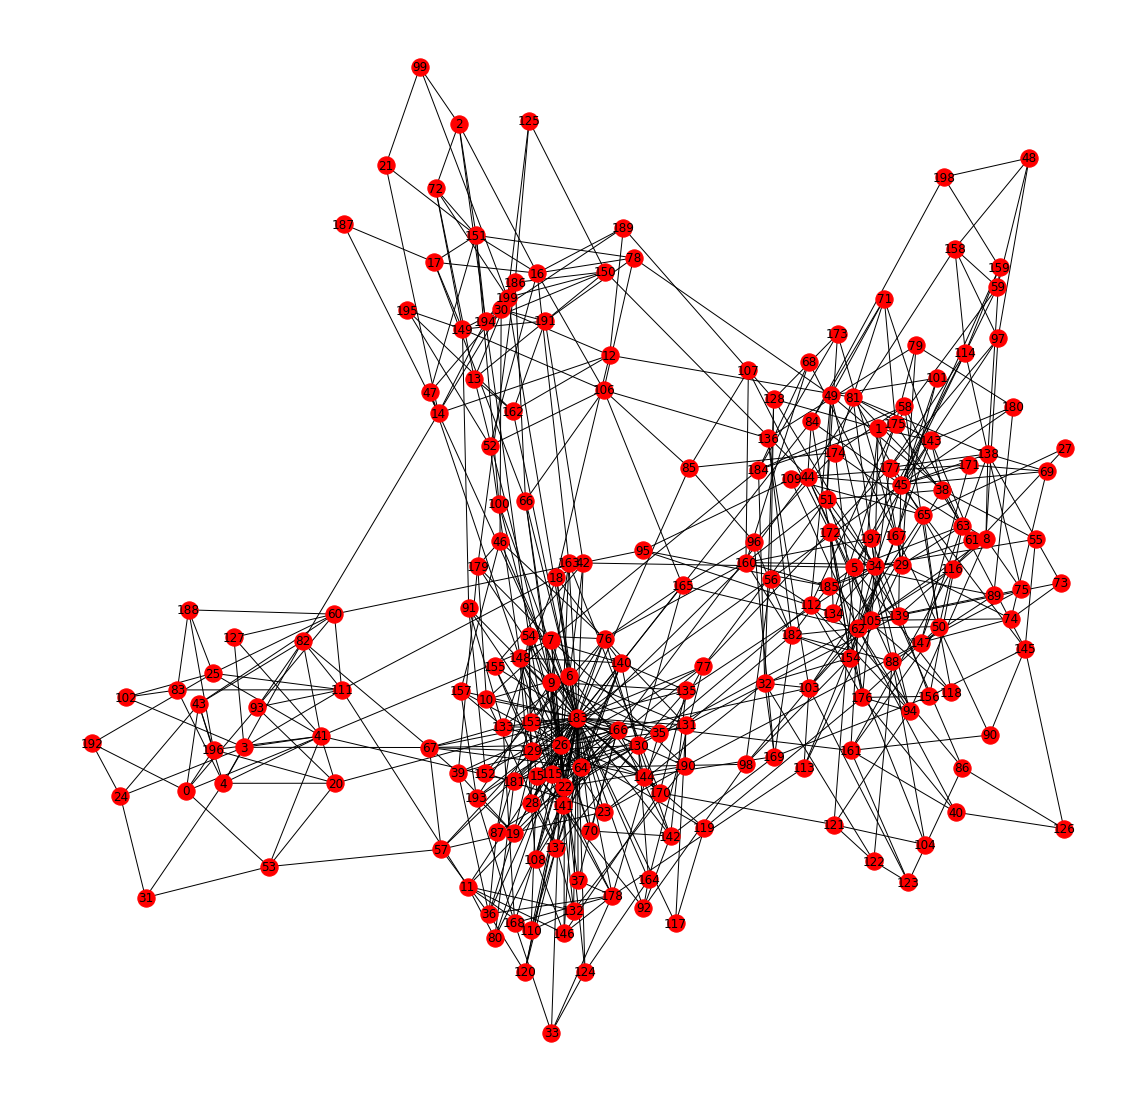

In [62]:
# Generujemy graf G w oparciu o Lancichinetti–Fortunato–Radicchi benchmark

from networkx.algorithms.community import LFR_benchmark_graph
from matplotlib.pyplot import figure
import numpy

G = LFR_benchmark_graph(n=200, tau1=3, tau2=1.5, mu=0.1, min_community=20, min_degree=3,
                        seed=42)
communities = {frozenset(G.nodes[v]['community']) for v in G}
figure(figsize=(15,15))
nx.draw(G, pos=nx.spring_layout(G), with_labels=True)

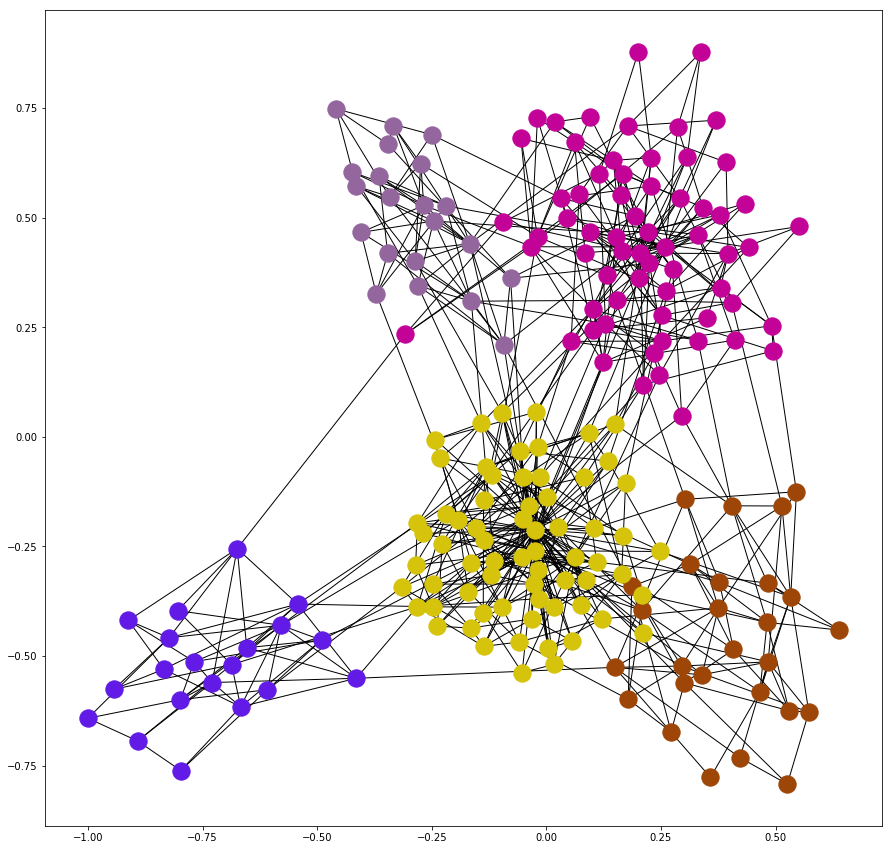

In [61]:
# Kolorujemy communities w grafie G

figure(figsize=(15,15))
pos = nx.spring_layout(G)
for community in list(communities):
    nx.draw_networkx_nodes(G, pos=pos,
                           nodelist=community,
                           node_color=numpy.random.rand(3,),
                           alpha=1)
nx.draw_networkx_edges(G, pos=pos, edgelist=G.edges)

plt.show()

In [70]:
# Informacje o faktycznych communities grafu G

print("Utworzone communities: ", len(communities), "\n")
communities_counter = 0
for community in communities:
    communities_counter += 1
    print("Community ", communities_counter)
    # print(list(community))
    print("Liczność community: ", len(community), "\n")

Utworzone communities:  5 

Community  1
Liczność community:  27 

Community  2
Liczność community:  67 

Community  3
Liczność community:  20 

Community  4
Liczność community:  65 

Community  5
Liczność community:  21 



## Wykrywanie communities
Istnieje wiele algorytmów do wykrywania communities w grafach.

https://networkx.github.io/documentation/stable/reference/algorithms/community.html

Przykładowy algorytm:

#### girvan_newman
The Girvan–Newman algorithm detects communities by progressively removing edges from the original graph. The algorithm removes the “most valuable” edge, traditionally the edge with the highest betweenness centrality, at each step.

#### greedy_modularity_communities
Find communities in graph using Clauset-Newman-Moore greedy modularity maximization.
Greedy modularity maximization begins with each node in its own community and joins the pair of communities that most increases modularity until no such pair exists.

In [67]:
# Znajdowanie communities w oparciu o algorytm Girvan–Newmana 

from networkx.algorithms.community.centrality import girvan_newman
communities_iter = girvan_newman(G)

communities_sum = 0
communities_gn = []

for community_gn in next(communities_iter):
    communities_sum += 1
    communities_gn.append(community_gn)
    print("Community ", communities_sum)
    # print(community_gn)
    print("Liczność community: ", len(community_gn), "\n")
    
print("Znaleziono communities: ", communities_sum)

Community  1
Liczność community:  20 

Community  2
Liczność community:  180 

Znaleziono communities:  2


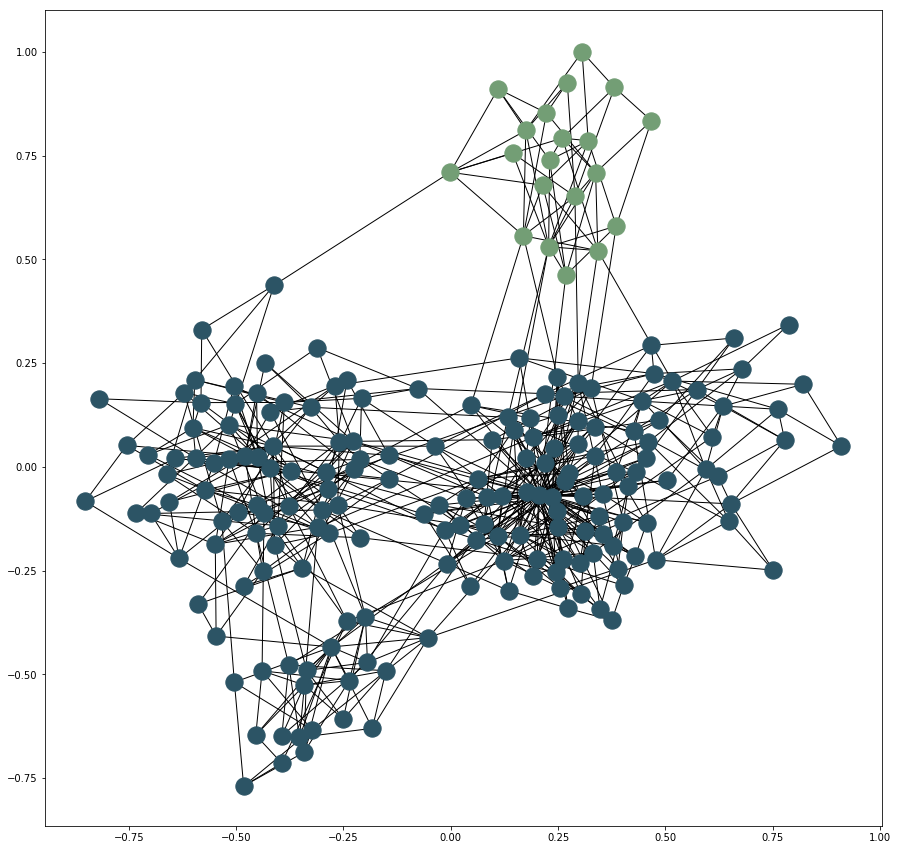

In [69]:
# Graf G pokolorowany według communities znalezionych w oparciu o algorytm Girvan–Newmana 

figure(figsize=(15,15))
pos = nx.spring_layout(G)
for community in list(communities_gn):
    nx.draw_networkx_nodes(G, pos=pos,
                           nodelist=community,
                           node_color=numpy.random.rand(3,),
                           alpha=1)
nx.draw_networkx_edges(G, pos=pos, edgelist=G.edges)

plt.show()

In [77]:
# Znajdowanie communities w oparciu o algorytm greedy_modularity_communities

from networkx.algorithms.community.modularity_max import greedy_modularity_communities

communities = greedy_modularity_communities(G)

print("Znaleziono communities: ", len(communities))
communities_counter = 1
for community in communities:
    print("Liczność community", communities_counter, ":", len(community), "\n")
    communities_counter += 1

Znaleziono communities:  5
Liczność community 1 : 67 

Liczność community 2 : 65 

Liczność community 3 : 27 

Liczność community 4 : 21 

Liczność community 5 : 20 



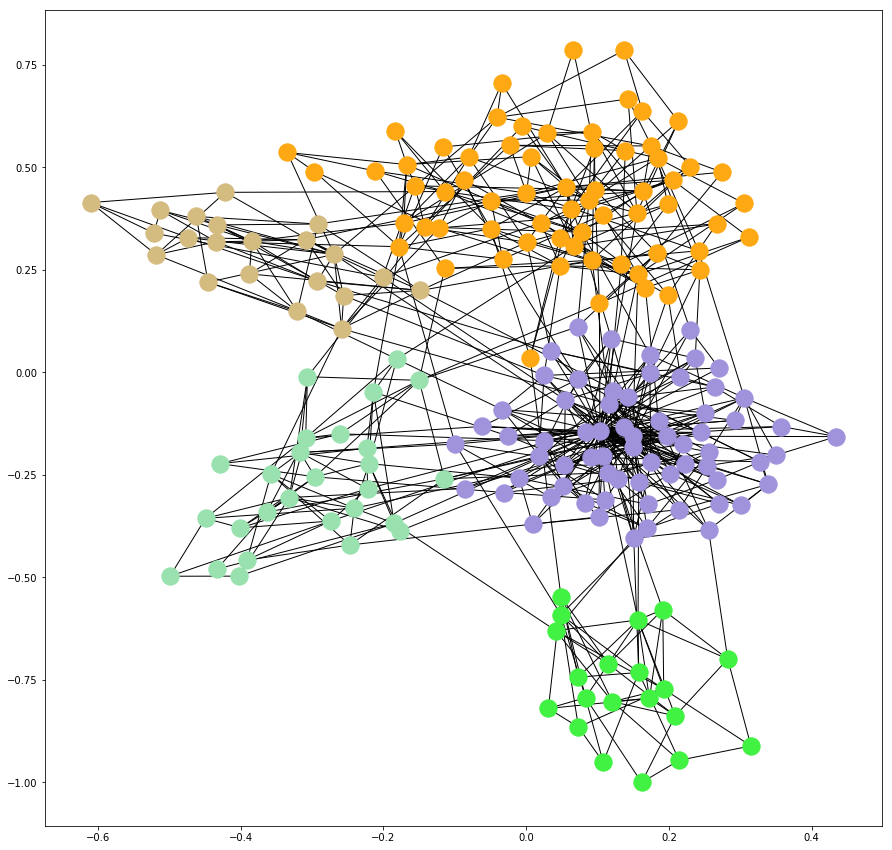

In [78]:
# Graf G pokolorowany według communities znalezionych w oparciu o algorytm greedy_modularity_communities

figure(figsize=(15,15))
pos = nx.spring_layout(G)
for community in list(communities):
    nx.draw_networkx_nodes(G, pos=pos,
                           nodelist=community,
                           node_color=numpy.random.rand(3,),
                           alpha=1,
                           state=42)
nx.draw_networkx_edges(G, pos=pos, edgelist=G.edges)

plt.show()

## Predykcja linków

Algorytmy do predykcji linków:

https://dschult-networkx.readthedocs.io/en/latest/reference/algorithms/link_prediction.html

jaccard_coefficient
resource_allocation_index

In [94]:
# Usuwamy wybrane krawędzie z grafu, żeby potem predykować ich istnienie

import random

def remove_edges_from_karate(Graph, edges_to_remove):
    edges = Graph.edges()
    for edge_to_rmv in edges_to_remove:
        G.remove_edge(edge_to_rmv[0], edge_to_rmv[1])
    return G, edges_to_remove
    
    
G = nx.karate_club_graph()
edges_to_remove = [(0,1), (0,19), (33,27), (15,32)]
G_without_some_edges, removed_edges = remove_edges_from_karate(G,edges_to_remove)

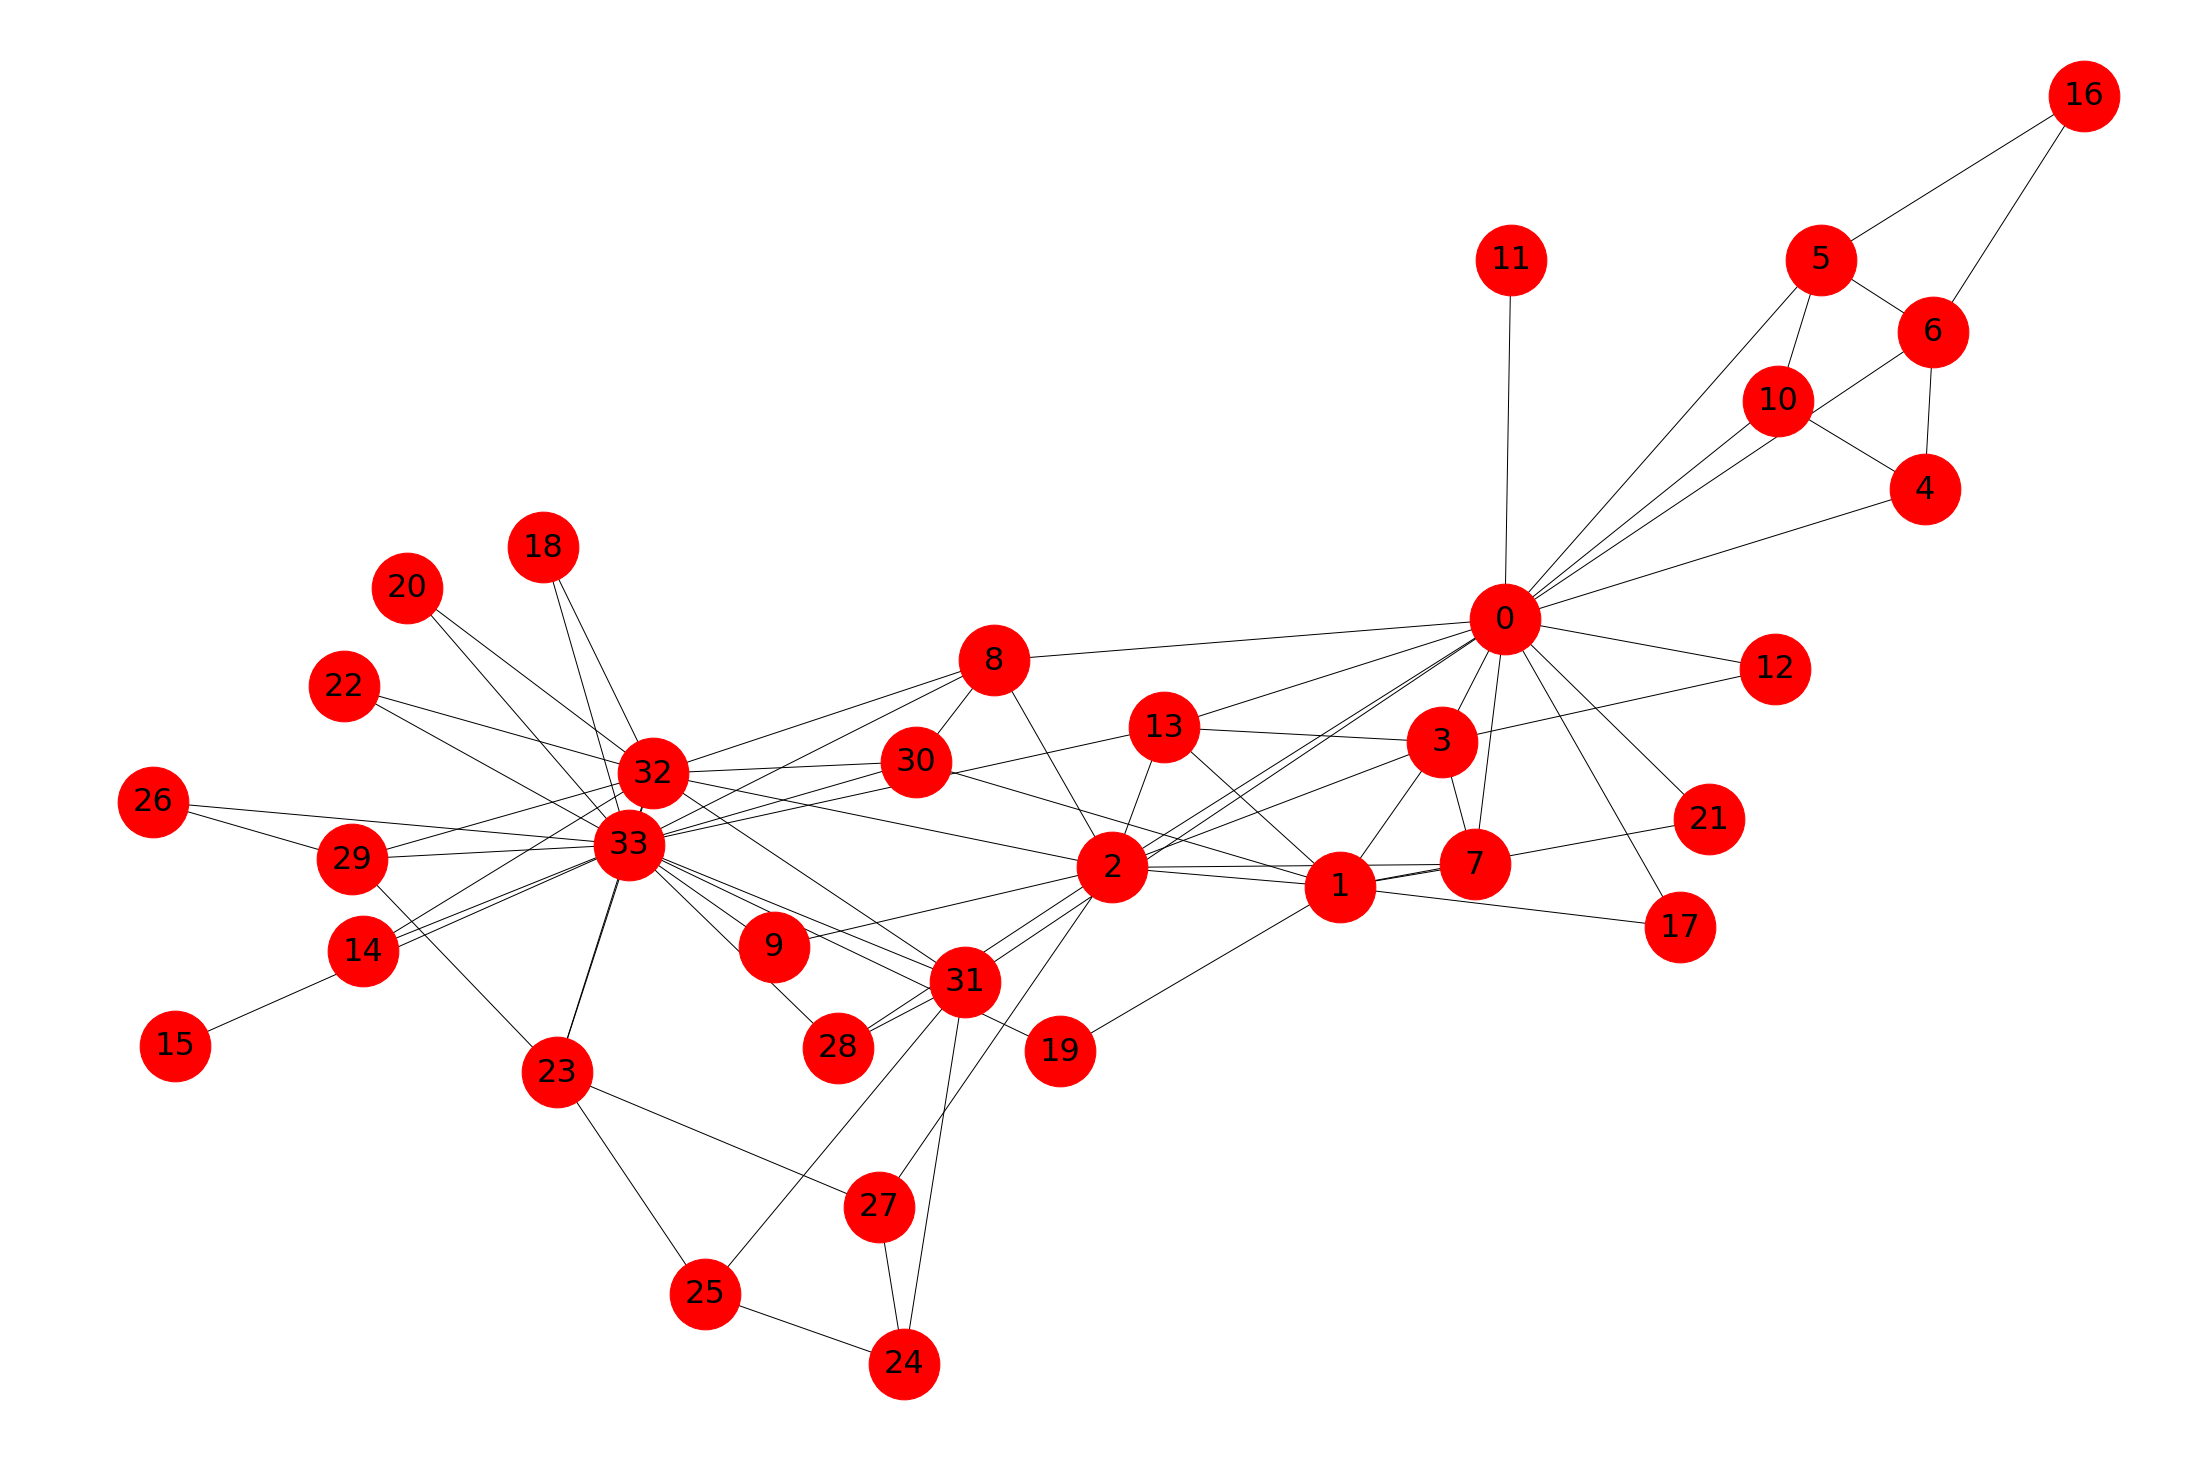

In [95]:
plt.figure(figsize=(30,20))
nx.draw_spring(G_without_some_edges, with_labels=True, node_size=5000, font_size=32, seed=42)
plt.show()

In [96]:
# TODO: Oblicz prawdopodobieństwo wystąpienia usuniętych krawędzi w oparciu o algorytmy dostępne w NetworkX
# (np. jaccard_coefficient, resource_allocation_index, adamic_adar_index).

jaccard = nx.jaccard_coefficient(G_without_some_edges, removed_edges)
print('Predykcja jaccard_coefficient:')
print(list(jaccard))

resource_allocation = nx.resource_allocation_index(G_without_some_edges, removed_edges)
print('Predykcja resource_allocation_index:')
print(list(resource_allocation))

Predykcja jaccard_coefficient:
[(0, 1, 0.375), (0, 19, 0.0), (33, 27, 0.05555555555555555), (15, 32, 0.09090909090909091)]
Predykcja resource_allocation_index:
[(0, 1, 1.7166666666666666), (0, 19, 0), (33, 27, 0.2), (15, 32, 0.0625)]


## Algorytm Page Rank 
Znajduje "najważniejsze" wierzchołki w grafie.
Wierzchołek jest tym ważniejszy, im więcej krawędzi do niego dochodzi (w grafie skierowanym: incoming links).
Pierwotnie służył do towrzenia listy rankingowej stron internetowych.

https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html#networkx.algorithms.link_analysis.pagerank_alg.pagerank

In [97]:
# TODO: W oparciu o algorytm Page Rank znajdź najważniejsze wierzchołki (top 5) w grafie G.

import operator

pr = nx.pagerank(G, alpha=0.9)
sorted_x = sorted(pr.items(), key=operator.itemgetter(1), reverse=True)

pprint.pprint (list(sorted_x)[:5])

[(33, 0.10397991721345097),
 (0, 0.09157087308053077),
 (32, 0.07020735784060685),
 (2, 0.06230573234708569),
 (1, 0.05145650246601102)]
